# 📊 ANÁLISIS DE MOVILIDAD: VIAJES, FRANJAS HORARIAS Y GRUPOS DEMOGRÁFICOS

Este proyecto contiene el análisis y visualizaciones sobre patrones de movilidad urbana.
A partir de un dataset de viajes, se estudian relaciones entre estaciones, franjas horarias, sexo y grupos etarios,
generando gráficos y métricas que permiten comprender mejor el comportamiento de los usuarios.

**Fuente de Datos**

Para la realización del mismo se tomaron los datos correspondientes al 2025, disponibles en la web
https://www.mibici.net/es/datos-abiertos/

Los mismos se encuentran separados por años y meses, así como un CSV diferente en el cual se muestran
las diferentes estaciones y sus elementos más relevantes.

El objetivo principal del análisis es dar respuesta a las siguientes preguntas:

    1- Cuál es la relación entre la edad y el sexo en cuánto al uso de las bicicletas públicas
       de la cuidad de Guadalajara, MX

    2- Cuál es la duración del viaje promedio.

    3- Cuáles días de la semana se suele emplear más

    4- Cuáles son los trayectos más frecuentes

    5- En qué horario hay una mayor demanda del servicio.

## 1. Análisis Exploratorio

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings('ignore')
cur_dir = os.getcwd()
data_dir = f"{cur_dir}/../data"
print(data_dir)


/media/DATOS/Proyectos/Python/MMB/Notebook/../data


## 2. Carga del dataset


In [42]:
# Cargando la información relacionada con el mes de Enero
df = pd.read_csv(f"{data_dir}/original/datos_abiertos_2025_01.csv", encoding="ISO-8859-15")
df.head()

,Viaje_Id,Usuario_Id,Genero,Año_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,37162342,601273,M,1982.0,2025-01-01 00:00:44,2025-01-01 00:11:29,211,395
1,37162343,1571524,M,2003.0,2025-01-01 00:04:11,2025-01-01 00:15:07,35,260
2,37162344,1435200,F,1984.0,2025-01-01 00:05:27,2025-01-01 00:15:23,35,260
3,37162345,126327,M,1988.0,2025-01-01 00:07:47,2025-01-01 00:17:42,190,11
4,37162346,416121,M,1994.0,2025-01-01 00:08:52,2025-01-01 00:18:10,273,8


## 3. Inspección inicial del dataset

Dimensiones, tipos de datos y primeras filas.

In [43]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])
df.info()

Filas: 380184
Columnas: 8
<class 'pandas.DataFrame'>
RangeIndex: 380184 entries, 0 to 380183
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Viaje_Id           380184 non-null  int64  
 1   Usuario_Id         380184 non-null  int64  
 2   Genero             377482 non-null  str    
 3   Año_de_nacimiento  380037 non-null  float64
 4   Inicio_del_viaje   380184 non-null  str    
 5   Fin_del_viaje      380184 non-null  str    
 6   Origen_Id          380184 non-null  int64  
 7   Destino_Id         380184 non-null  int64  
dtypes: float64(1), int64(4), str(3)
memory usage: 23.2 MB


In [44]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Viaje_Id,380184.0,NaN,NaN,NaN,37384223.925894,127547.877008,37162342.0,37274521.75,37384843.5,37494844.25,37603737.0
Usuario_Id,380184.0,NaN,NaN,NaN,2180325.874684,1592027.65496,102.0,575363.0,2105532.0,4031465.0,4521773.0
Genero,377482,2,M,275441,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Año_de_nacimiento,380037.0,NaN,NaN,NaN,1990.030973,10.936673,1920.0,1984.0,1993.0,1998.0,2023.0
Inicio_del_viaje,380184,336902,2025-01-19 11:23:34,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fin_del_viaje,380184,337653,2025-01-20 18:15:55,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origen_Id,380184.0,NaN,NaN,NaN,153.423761,111.532537,2.0,51.0,155.0,254.0,398.0
Destino_Id,380184.0,NaN,NaN,NaN,155.246675,114.979288,2.0,51.0,154.0,260.0,398.0


## 4. Valores faltantes

Revisión de `NaN` por columna.

In [45]:
df.isna().mean().sort_values(ascending=False) * 100

Genero               0.710708
Año_de_nacimiento    0.038665
Usuario_Id           0.000000
Viaje_Id             0.000000
Inicio_del_viaje     0.000000
Fin_del_viaje        0.000000
Origen_Id            0.000000
Destino_Id           0.000000
dtype: float64

## 5. Conversión de fechas y columnas temporales

Se convierten `Inicio_del_viaje` y `Fin_del_viaje` a tipo datetime y se crean columnas derivadas.

In [46]:
df['Inicio_del_viaje'] = pd.to_datetime(df['Inicio_del_viaje'], errors='coerce')
df['Fin_del_viaje'] = pd.to_datetime(df.get('Fin_del_viaje'), errors='coerce')

df['Hora'] = df['Inicio_del_viaje'].dt.hour
df['DiaSemana'] = df['Inicio_del_viaje'].dt.day_name()
df['Fecha'] = df['Inicio_del_viaje'].dt.date
df['Mes'] = df['Inicio_del_viaje'].dt.to_period('M')

df[['Inicio_del_viaje', 'Fin_del_viaje', 'Hora', 'DiaSemana', 'Mes']].head()

,Inicio_del_viaje,Fin_del_viaje,Hora,DiaSemana,Mes
0,2025-01-01 00:00:44,2025-01-01 00:11:29,0,Wednesday,2025-01
1,2025-01-01 00:04:11,2025-01-01 00:15:07,0,Wednesday,2025-01
2,2025-01-01 00:05:27,2025-01-01 00:15:23,0,Wednesday,2025-01
3,2025-01-01 00:07:47,2025-01-01 00:17:42,0,Wednesday,2025-01
4,2025-01-01 00:08:52,2025-01-01 00:18:10,0,Wednesday,2025-01


##  6. Duración de los viajes

Esta sección muestra la distribución de la duración de los viajes en minutos.
Se utiliza la columna `Duracion_min`, calculada como la diferencia entre `Fin_del_viaje` y `Inicio_del_viaje`.
El histograma se limita al percentil 99 para evitar que los valores extremos distorsionen la visualización.


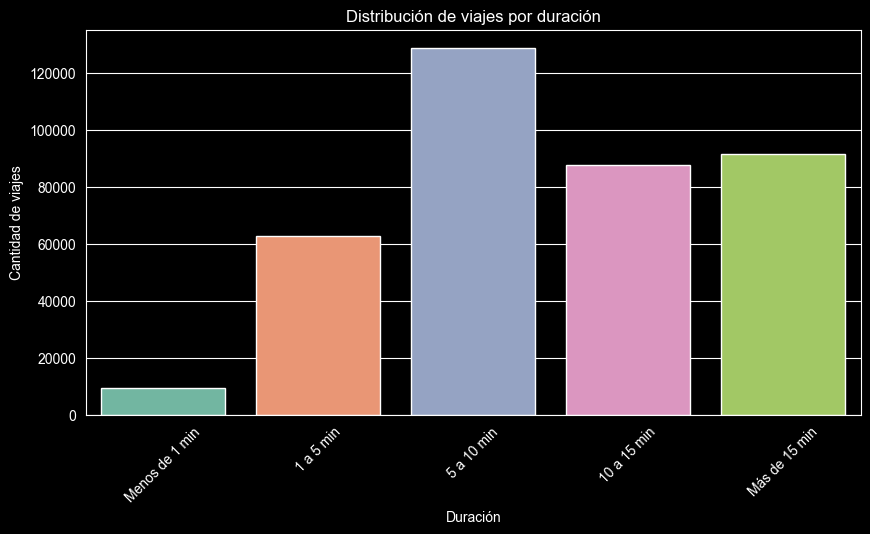

CategoriaDuracion
Menos de 1 min      9282
1 a 5 min          62828
5 a 10 min        128765
10 a 15 min        87822
Más de 15 min      91487
Name: count, dtype: int64

In [47]:
# Cálculo de duración y categorización en un único bloque

# 1. Calcular duración en minutos
df['Duracion_min'] = (df['Fin_del_viaje'] - df['Inicio_del_viaje']).dt.total_seconds() / 60

# 2. Definir rangos solicitados
bins_duracion = [0, 1, 5, 10, 15, float('inf')]
labels_duracion = [
    "Menos de 1 min",
    "1 a 5 min",
    "5 a 10 min",
    "10 a 15 min",
    "Más de 15 min"
]

# 3. Crear categoría de duración
df['CategoriaDuracion'] = pd.cut(
    df['Duracion_min'],
    bins=bins_duracion,
    labels=labels_duracion,
    right=False
)

# 4. Gráfico de barras por categoría
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='CategoriaDuracion', order=labels_duracion, palette='Set2')
plt.title('Distribución de viajes por duración')
plt.xlabel('Duración')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=45)
plt.show()

# 5. Mostrar tabla resumen
df['CategoriaDuracion'].value_counts().sort_index()


## 7. Distribución horaria de los viajes

Análisis exploratorio de las horas del día en que se realiza el viaje

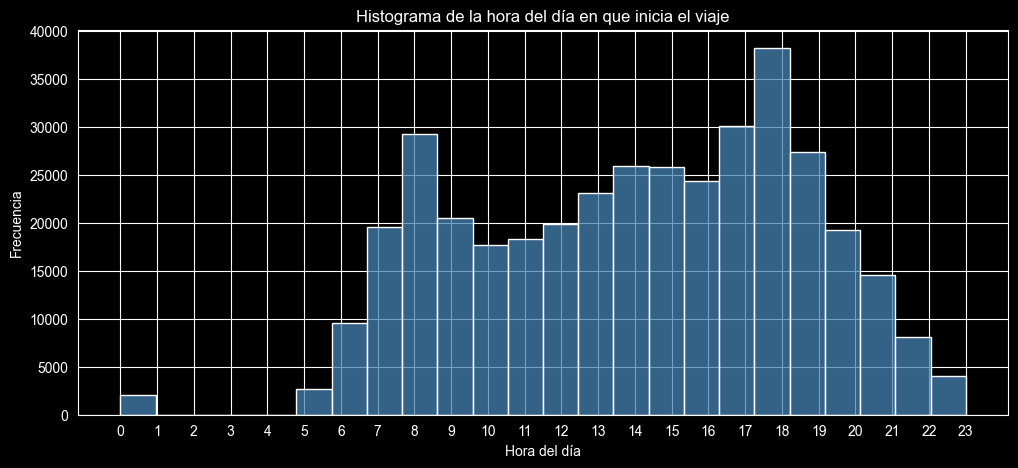

In [48]:
# Clasificación de viajes por hora del día en tramos definidos

# 1. Asegurar que la columna Hora existe
df['Hora'] = df['Inicio_del_viaje'].dt.hour

# 2. Definir tramos horarios (puedes ajustarlos si quieres otros)
bins_hora = [0, 6, 9, 12, 15, 18, 21, 24]
labels_hora = [
    "00-06 Madrugada",
    "06-09 Mañana",
    "09-12 Media mañana",
    "12-15 Mediodía",
    "15-18 Tarde",
    "18-21 Atardecer",
    "21-24 Noche"
]

# 3. Crear categoría de hora
df['CategoriaHora'] = pd.cut(
    df['Hora'],
    bins=bins_hora,
    labels=labels_hora,
    right=False
)

# 4. Histograma continuo de la hora del día (opcional)
plt.figure(figsize=(12,5))
sns.histplot(df['Hora'], bins=24, kde=False, color='steelblue')
plt.title('Histograma de la hora del día en que inicia el viaje')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(0,24,1))
plt.show()


## 8. Distribución de los viajes por edades

Análisis exploratorio de las edades de los usuarios que realizan los viajes

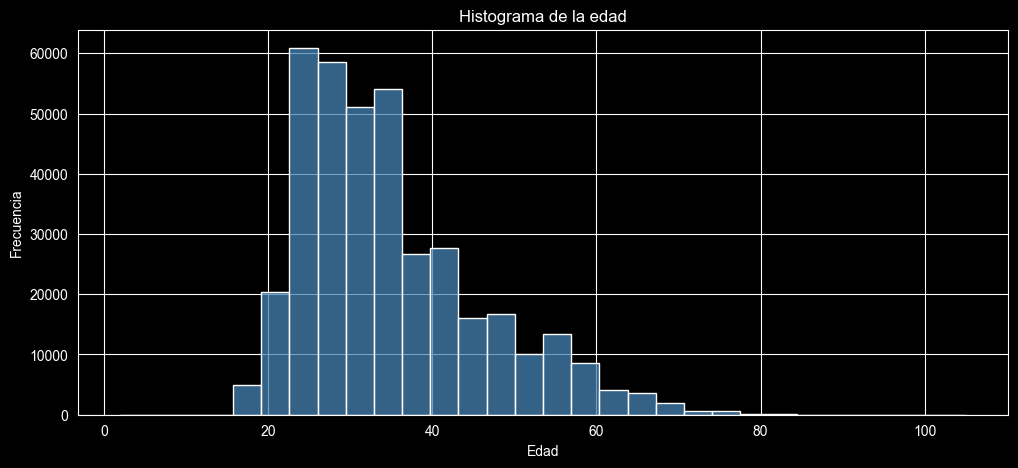

In [49]:
# Cálculo de edad y categorización en un único bloque

df['Edad'] = 2025 - df['Año_de_nacimiento']

plt.figure(figsize=(12,5))
sns.histplot(df['Edad'], bins=30, kde=False, color='steelblue')
plt.title('Histograma de la edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


## 9. Distribución de los viajes por estación de origen

Análisis exploratorio de las estaciones en las que los usuarios comienzan su viaje

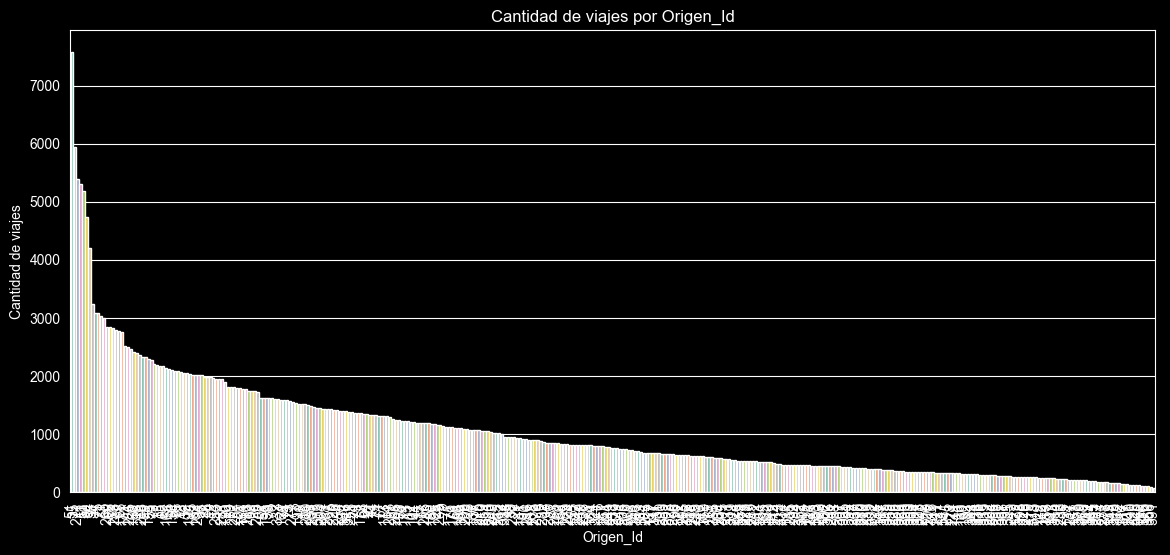

In [50]:
# Gráfico de distribución de viajes por Origen_Id

conteo_origen = df['Origen_Id'].value_counts().reset_index()
conteo_origen.columns = ['Origen_Id', 'Cantidad']

plt.figure(figsize=(14,6))
sns.barplot(
    data=conteo_origen,
    x='Origen_Id',
    y='Cantidad',
    palette='Set2',
    order=conteo_origen['Origen_Id']
)

plt.title('Cantidad de viajes por Origen_Id')
plt.xlabel('Origen_Id')
plt.ylabel('Cantidad de viajes')
plt.xticks(rotation=90)
plt.show()


## 10. Heatmap Hora × Día de la semana

Patrones semanales de uso por hora del día.

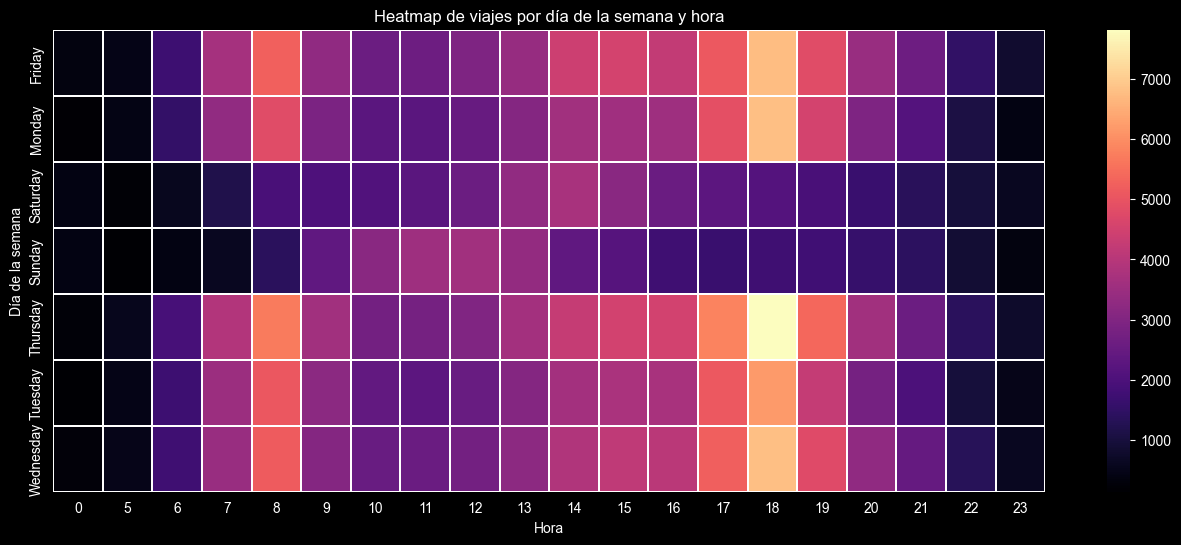

In [51]:
tabla_heat = df.groupby(['DiaSemana', 'Hora']).size().reset_index(name='Cantidad')
matriz = tabla_heat.pivot(index='DiaSemana', columns='Hora', values='Cantidad').fillna(0)

plt.figure(figsize=(16,6))
sns.heatmap(matriz, cmap='magma', linewidths=0.3)
plt.title('Heatmap de viajes por día de la semana y hora')
plt.xlabel('Hora')
plt.ylabel('Día de la semana')
plt.show()

## 11. Duración del viaje

Se calcula la duración en minutos a partir de `Inicio_del_viaje` y `Fin_del_viaje`.
Si no tienes `Fin_del_viaje`, puedes omitir esta sección o adaptarla.

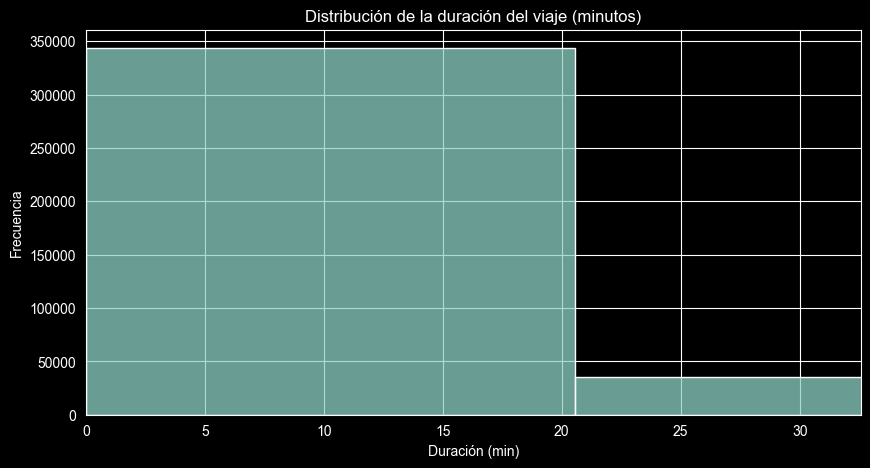

In [52]:
if 'Fin_del_viaje' in df.columns:
    df['Duracion_min'] = (df['Fin_del_viaje'] - df['Inicio_del_viaje']).dt.total_seconds() / 60

    plt.figure(figsize=(10,5))
    sns.histplot(df['Duracion_min'], bins=50, kde=False)
    plt.xlim(0, df['Duracion_min'].quantile(0.99))
    plt.title('Distribución de la duración del viaje (minutos)')
    plt.xlabel('Duración (min)')
    plt.ylabel('Frecuencia')
    plt.show()

    df['Duracion_min'].describe()
else:
    print('No se encontró la columna Fin_del_viaje. Se omite el análisis de duración.')

## 12. Outliers en duración (si existe)

Boxplot para detectar valores atípicos en la duración del viaje.

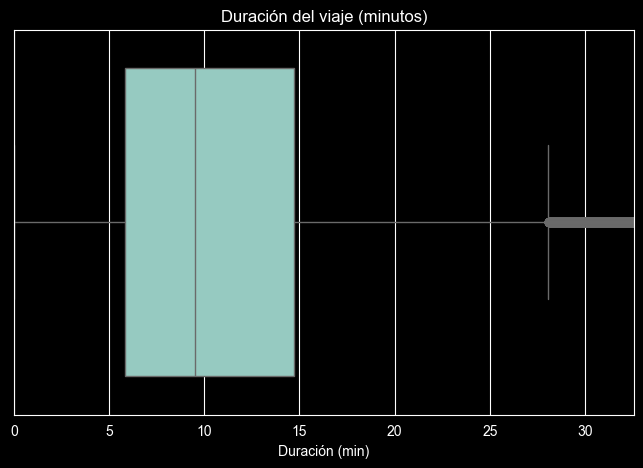

In [53]:
if 'Duracion_min' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['Duracion_min'])
    plt.xlim(0, df['Duracion_min'].quantile(0.99))
    plt.title('Duración del viaje (minutos)')
    plt.xlabel('Duración (min)')
    plt.show()


## 13. Correlaciones entre variables numéricas

Heatmap de correlación para variables numéricas (Edad, Duración, etc.).

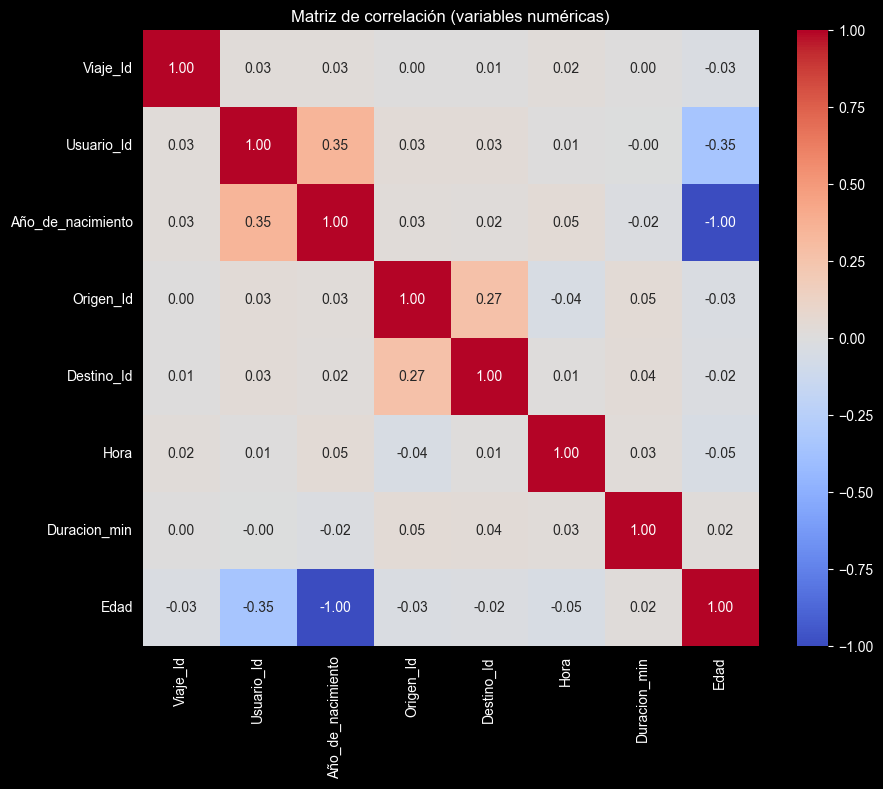

,Viaje_Id,Usuario_Id,Año_de_nacimiento,Origen_Id,Destino_Id,Hora,Duracion_min,Edad
Viaje_Id,1.000000,0.030578,0.030280,0.003601,0.007532,0.024450,0.000820,-0.030280
Usuario_Id,0.030578,1.000000,0.346525,0.034471,0.033696,0.007012,-0.000684,-0.346525
Año_de_nacimiento,0.030280,0.346525,1.000000,0.027536,0.023251,0.046733,-0.021462,-1.000000
Origen_Id,0.003601,0.034471,0.027536,1.000000,0.269124,-0.042964,0.046069,-0.027536
Destino_Id,0.007532,0.033696,0.023251,0.269124,1.000000,0.012235,0.037058,-0.023251
Hora,0.024450,0.007012,0.046733,-0.042964,0.012235,1.000000,0.028022,-0.046733
Duracion_min,0.000820,-0.000684,-0.021462,0.046069,0.037058,0.028022,1.000000,0.021462
Edad,-0.030280,-0.346525,-1.000000,-0.027536,-0.023251,-0.046733,0.021462,1.000000


In [54]:
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de correlación (variables numéricas)')
plt.show()

corr

## 14. Resumen y conclusiones parciales

1. Se detectó que los archivos CSV no todos tienen la misma codificación de caracteres
2. Hay presencia de valores nulos que deben ser eliminados
3. Hay viajes de un minuto o menos que no aportan información relevante para el análisis
4. La frecuencia de uso del servicio varía bastante entre las diferentes estaciones.
5. Existen patrones de comportamiento en el uso de las bicicletas diferentes en función de la edad del usuario

